In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [45]:
runs = RunStats.objects.all().annotate(
    topics = models.Count('topic')
)
df =  pd.DataFrame.from_dict(list(runs.values()))

In [46]:
print(df.head())

   batch_count docs_seen       error  errortype  iterations  \
0            0      None  455.623605  Frobenius         127   
1            0      None  461.042675  Frobenius         199   
2            0      None  442.320559  Frobenius         110   
3            0      None  471.500379  Frobenius         199   
4            0      None  443.950697  Frobenius         189   

                       last_update  max_features method  ngram notes  run_id  \
0 2017-05-13 10:53:43.240945+00:00         50000     nm      1  None      34   
1 2017-05-13 21:40:58.684470+00:00        100000     nm      1  None      43   
2 2017-05-12 23:41:13.206234+00:00         10000     nm      1  None      25   
3 2017-05-13 06:54:48.353857+00:00         50000     nm      1  None      32   
4 2017-05-11 21:47:14.805946+00:00          5000     nm      1  None      12   

                             start topic_scores_current topic_titles_current  \
0 2017-05-13 08:48:05.541690+00:00                 True     

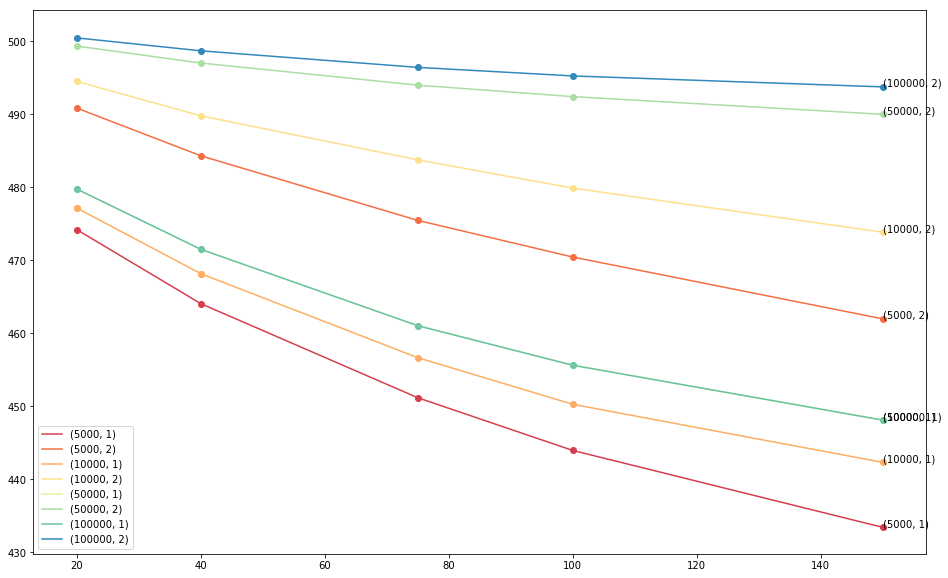

In [44]:
ndf = df.sort_values(by='topics', ascending=1).reset_index(drop=True)

colorset=["#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#66c2a5","#3288bd"]
plt.rcParams["figure.figsize"] = [16,10]
gndf = ndf.groupby(['max_features','ngram'])
ps = []
gs = []
i = 0
for name,group in gndf:
    p = plt.plot(group['topics'],group['error'],color=colorset[i])
    plt.scatter(group['topics'],group['error'],color=colorset[i])
    m = group[group['topics']==150]
    plt.text(
        m['topics'],
        m['error'],name
    )
    ps.append(p[0])
    gs.append(name)
    i+=1
#p1 = plt.plot(ndf['topics'],ndf[ndf[max_features==5000]]['error'],color='#fbb4ae')
#p2 = plt.plot(ndf['topics'],ndf['iterations'],color='#b3cde3')
plt.legend((ps),(gs))

plt.show()